# INDEPENDENT PROJECT: CUSTOMER BEHAVIOUR ANALYSIS

## Problem Definition

### a) Specifying the Data Analytic Question

Perform analysis on data from Kira Plastinina, a Russian chain of retail stores, to help inform the team in formulating the marketing and sales strategies of the brand. 

### b) Defining the Metric for Success

Attain a percentage accuracy that is above 80. This would be an optimum accuracy considering the data is not from a very sensitive field.

### c) Understanding the context

Kira Plastinina, is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups

### d) Experimental design Taken

True Exprimental Design

1. Problem Definition
2. Data Sourcing
3. Check the Data
4. Perform Data Cleaning
5. Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)
6. Implement the Solution

## Libraries

In [1]:
library(repr)

library(readr)

library(dplyr)

library(corrplot)

library(DataExplorer)

library(xgboost)

library(tidyr)

library(stringr)

library(rpart)

library(ggplot2)

library(rpart.plot)

library(cowplot)

library(caret)

library(doParallel)

library(VIM)

library(ggpubr)

theme_set(theme_pubr())


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

corrplot 0.84 loaded

Attaching package: 'xgboost'

The following object is masked from 'package:dplyr':

    slice


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Loading required package: lattice
Loading required package: foreach
Loading required package: iterators
Loading required package: parallel
Loading required package: colorspace
Loading required package: grid
Loading required package: data.table

Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

VIM is ready to use. 
 Since version 4.0.0 the 

## Reading the Data

In [2]:
# READING THE DATA

df <- read.csv("C:\\Users\\ned\\Documents\\TED\\my research data\\data sets\\online_shoppers_intention.csv")

## Checking the Data

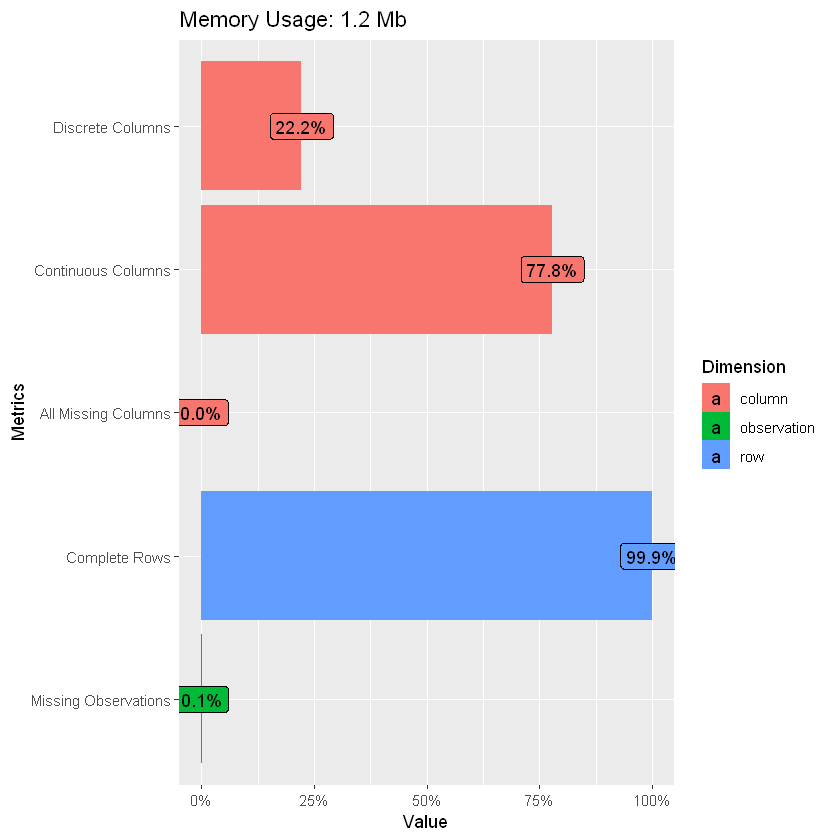

In [17]:
# DATA INTRO

plot_intro(df)

The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represents the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another. 


The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 


The value of the "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 


The value of the "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.

The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. 
The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date.
For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes the operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.


#### TOP ROWS

In [18]:
# PREVIEWING TOP OF THE DATA

head(df)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


#### BOTTOM ROWS

In [19]:
# PREVIEWING BOTTOM OF THE DATA

tail(df)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,0,0,1,0,16,503.000,0.000000000,0.03764706,0.00000,0,Nov,2,2,1,1,Returning_Visitor,FALSE,FALSE
12326,3,145,0,0,53,1783.792,0.007142857,0.02903061,12.24172,0,Dec,4,6,1,1,Returning_Visitor,TRUE,FALSE
12327,0,0,0,0,5,465.750,0.000000000,0.02133333,0.00000,0,Nov,3,2,1,8,Returning_Visitor,TRUE,FALSE
12328,0,0,0,0,6,184.250,0.083333333,0.08666667,0.00000,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
12329,4,75,0,0,15,346.000,0.000000000,0.02105263,0.00000,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
12330,0,0,0,0,3,21.250,0.000000000,0.06666667,0.00000,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


#### UNIQUE VALUES

In [20]:
# NUMBER OF UNIQUE VALUES IN THE DATA

sapply(df, function(x) length(unique(x)))

Administrative Administrative_Duration           Informational 
                     28                    3337                      18 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                   1260                     312                    9553 
            BounceRates               ExitRates              PageValues 
                   1873                    4778                    2704 
             SpecialDay                   Month        OperatingSystems 
                      6                      10                       8 
                Browser                  Region             TrafficType 
                     13                       9                      20 
            VisitorType                 Weekend                 Revenue 
                      3                       2                       2

#### DATA SIZE

In [21]:
glimpse(df)

Observations: 12,330
Variables: 18
$ Administrative          <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0...
$ Administrative_Duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0...
$ Informational           <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ Informational_Duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0...
$ ProductRelated          <int> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6...
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 6...
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.05...
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.14...
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8...
$ Month                   <fct> Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb, Feb...
$ OperatingSystems        <int> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3...
$ Browser        

#### VARIABLE TYPES

In [23]:
#Checking the data type of each column
sapply(df, class)

Administrative Administrative_Duration           Informational 
              "integer"               "numeric"               "integer" 
 Informational_Duration          ProductRelated ProductRelated_Duration 
              "numeric"               "integer"               "numeric" 
            BounceRates               ExitRates              PageValues 
              "numeric"               "numeric"               "numeric" 
             SpecialDay                   Month        OperatingSystems 
              "numeric"                "factor"               "integer" 
                Browser                  Region             TrafficType 
              "integer"               "integer"               "integer" 
            VisitorType                 Weekend                 Revenue 
               "factor"               "logical"               "logical"

#### FEATURE DENSITY

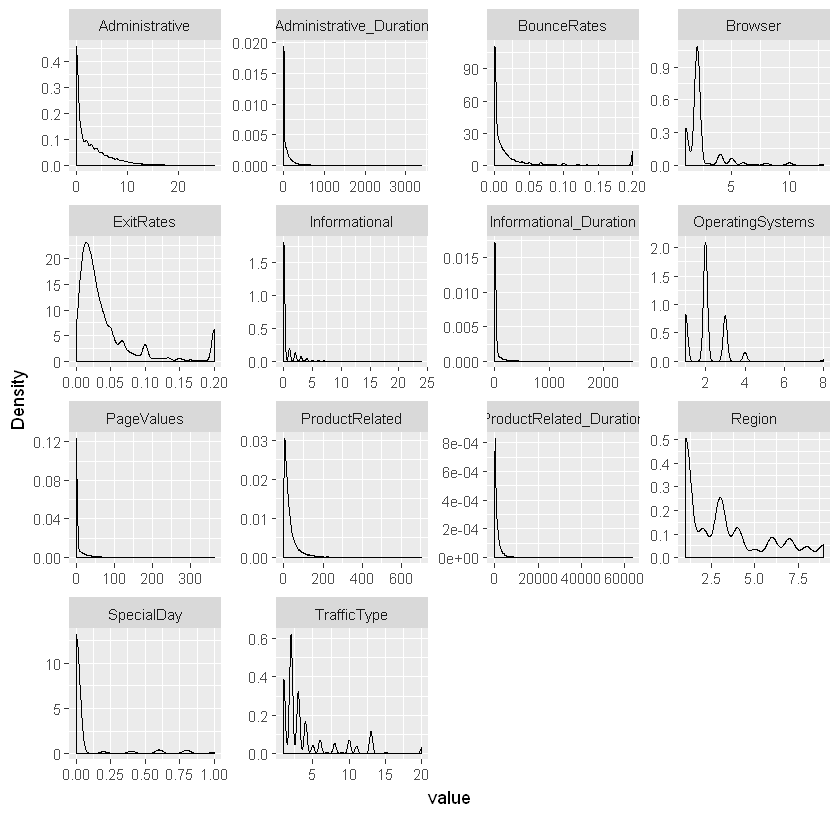

In [24]:
plot_density(df)

#### FEATURE REPORT

In [25]:
create_report(df)



processing file: report.rmd


  |..                                                               |   2%
   inline R code fragments

  |...                                                              |   5%
label: global_options (with options) 
List of 1
 $ include: logi FALSE

  |.....                                                            |   7%
  ordinary text without R code

  |......                                                           |  10%
label: introduce
  |........                                                         |  12%
  ordinary text without R code

  |.........                                                        |  14%
label: plot_intro
  |...........                                                      |  17%
  ordinary text without R code

  |............                                                     |  19%
label: data_structure
  |..............                                                   |  21%
  ordinary text without R code

  |...............                      

output file: C:/Users/ned/Documents/TED/my research data/R Programming Language/report.knit.md



"C:/Users/ned/ANACON~1/Scripts/pandoc" +RTS -K512m -RTS "C:/Users/ned/Documents/TED/my research data/R Programming Language/report.utf8.md" --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash+smart --output pandoc2bdc581f1a00.html --email-obfuscation none --self-contained --standalone --section-divs --table-of-contents --toc-depth 6 --template "C:\Users\ned\Documents\R\win-library\3.6\rmarkdown\rmd\h\default.html" --no-highlight --variable highlightjs=1 --variable "theme:yeti" --include-in-header "C:\Users\ned\AppData\Local\Temp\RtmpqSH2fu\rmarkdown-str2bdc2e7f1537.html" --mathjax --variable "mathjax-url:https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML" --lua-filter "C:/Users/ned/Documents/R/win-library/3.6/rmarkdown/rmd/lua/pagebreak.lua" --lua-filter "C:/Users/ned/Documents/R/win-library/3.6/rmarkdown/rmd/lua/latex-div.lua" 



Output created: report.html


Report is generated at "C:/Users/ned/Documents/TED/my research data/R Programming Language/report.html".


## Data Cleaning

In [28]:
categorical_cols = select_if(df, is.factor)
numeric_cols = select_if(df, is.numeric)

#### OUTLIERS

In [26]:
# FUNCTION THAT ENABLES US TO DETERMINE OUTLIERS IN THE DATASET  

"outlier" <-
function (x, opposite = FALSE, logical = FALSE) 
{
    if (is.matrix(x)) 
        apply(x, 2, outlier, opposite = opposite, logical = logical)
    else if (is.data.frame(x)) 
        sapply(x, outlier, opposite = opposite, logical = logical)
    else {
	if (xor(((max(x,na.rm=TRUE) - mean(x,na.rm=TRUE)) < (mean(x,na.rm=TRUE) - min(x,na.rm=TRUE))),opposite)) 
		{
			if (!logical) min(x,na.rm=TRUE)
			else x == min(x,na.rm=TRUE)
		}
		else 
		{
			if (!logical) max(x,na.rm=TRUE)
			else x == max(x,na.rm=TRUE)
		}
	} 
}


In [30]:
# OUTLIERS IN OUR DATASET

outlier(numeric_cols)

Administrative Administrative_Duration           Informational 
                27.0000               3398.7500                 24.0000 
 Informational_Duration          ProductRelated ProductRelated_Duration 
              2549.3750                705.0000              63973.5222 
            BounceRates               ExitRates              PageValues 
                 0.2000                  0.2000                361.7637 
             SpecialDay        OperatingSystems                 Browser 
                 1.0000                  8.0000                 13.0000 
                 Region             TrafficType 
                 9.0000                 20.0000

#### MISSING VALUES

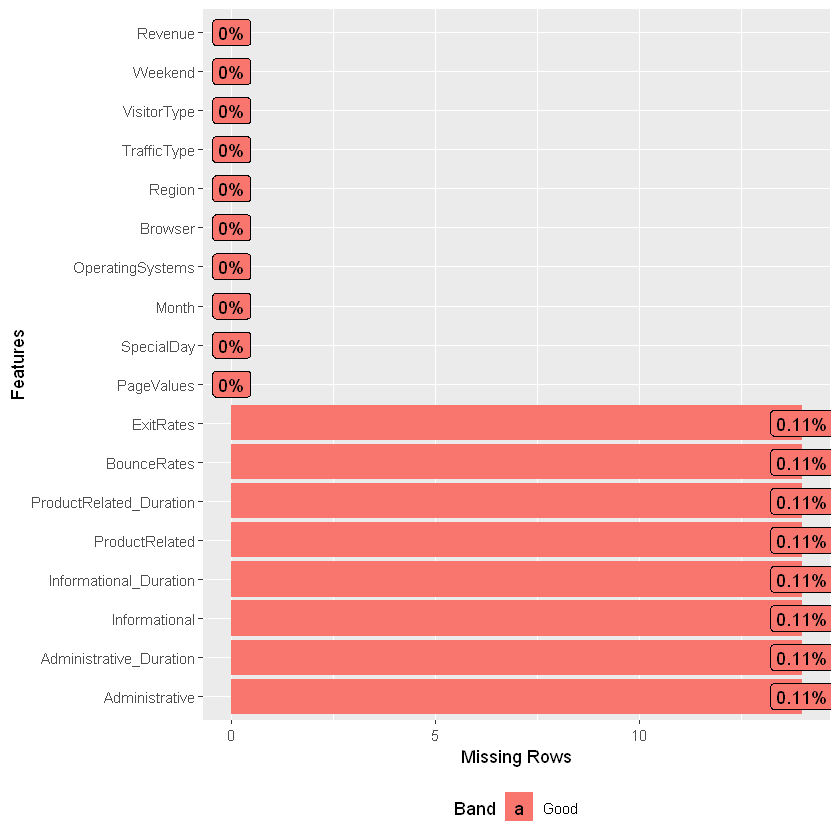

In [34]:
plot_missing(df)


 Variables sorted by number of missings: 
                Variable       Count
          Administrative 0.001135442
 Administrative_Duration 0.001135442
           Informational 0.001135442
  Informational_Duration 0.001135442
          ProductRelated 0.001135442
 ProductRelated_Duration 0.001135442
             BounceRates 0.001135442
               ExitRates 0.001135442
              PageValues 0.000000000
              SpecialDay 0.000000000
                   Month 0.000000000
        OperatingSystems 0.000000000
                 Browser 0.000000000
                  Region 0.000000000
             TrafficType 0.000000000
             VisitorType 0.000000000
                 Weekend 0.000000000
                 Revenue 0.000000000


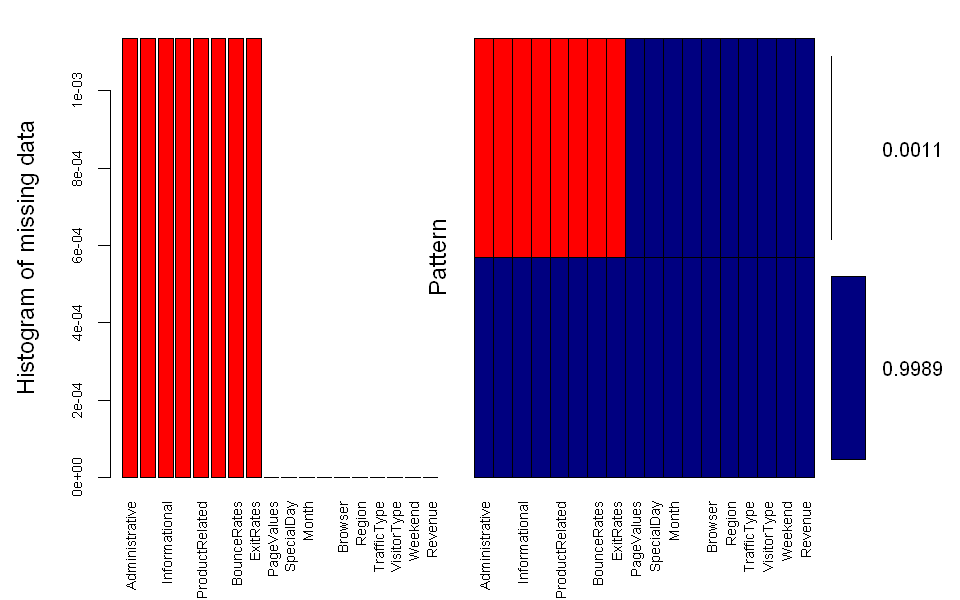

In [64]:
options(repr.plot.width=8, repr.plot.height=5)

aggr_plot = aggr(df, col=c('navyblue','red'), numbers=TRUE, sortVars=TRUE,
                 labels=names(df), cex.axis=.7, gap=1,
                 ylab=c("Histogram of missing data","Pattern"))

8 columns have missing values

All 8 columns have 14 missing values each

## Exploratory Data Analysis

#### VARIABLE IMPORTANCE


Classification tree:
rpart(formula = Revenue ~ ., data = df, method = "class")

Variables actually used in tree construction:
[1] Administrative BounceRates    Month          PageValues    

Root node error: 1908/12330 = 0.15474

n= 12330 

        CP nsplit rel error  xerror     xstd
1 0.197065      0   1.00000 1.00000 0.021048
2 0.095388      1   0.80294 0.80975 0.019267
3 0.059224      2   0.70755 0.71226 0.018225
4 0.012579      3   0.64832 0.66300 0.017659
5 0.010000      5   0.62317 0.64990 0.017503
Call:
rpart(formula = Revenue ~ ., data = df, method = "class")
  n= 12330 

          CP nsplit rel error    xerror       xstd
1 0.19706499      0 1.0000000 1.0000000 0.02104771
2 0.09538784      1 0.8029350 0.8097484 0.01926701
3 0.05922432      2 0.7075472 0.7122642 0.01822523
4 0.01257862      3 0.6483229 0.6629979 0.01765879
5 0.01000000      5 0.6231656 0.6498952 0.01750317

Variable importance
             PageValues             BounceRates          Administrative 
           

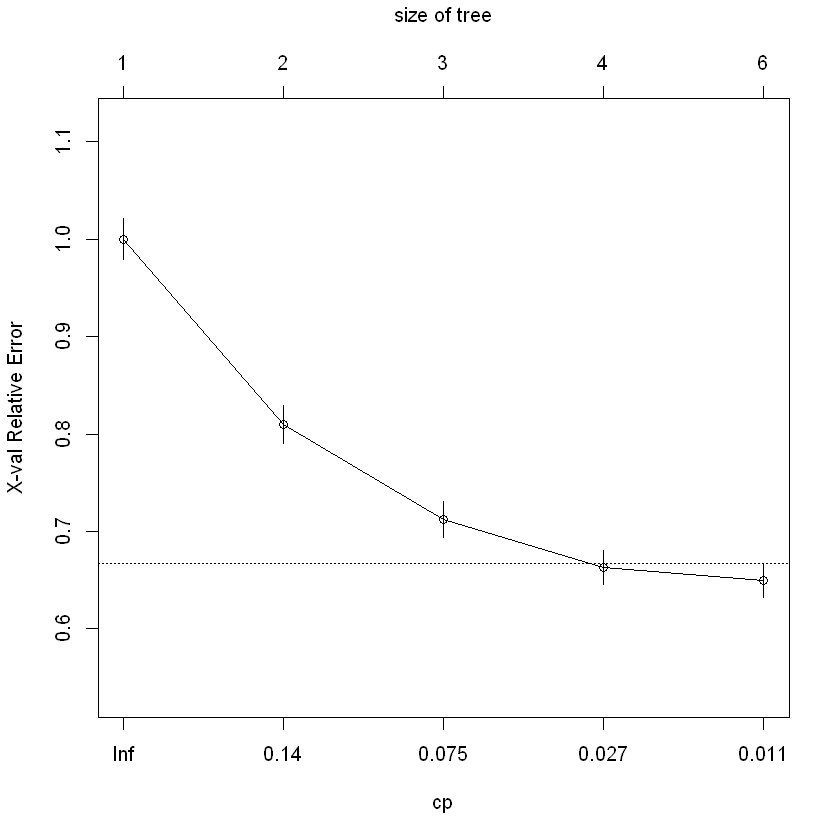

In [36]:
# DECISION TREE TO CHECK VARIABLE IMPORTANCE

talltree <- rpart( Revenue ~ . , data = df, method = "class")

# display the results

printcp(talltree)

plotcp(talltree)

summary(talltree)

#### TREE VISUALIZATION

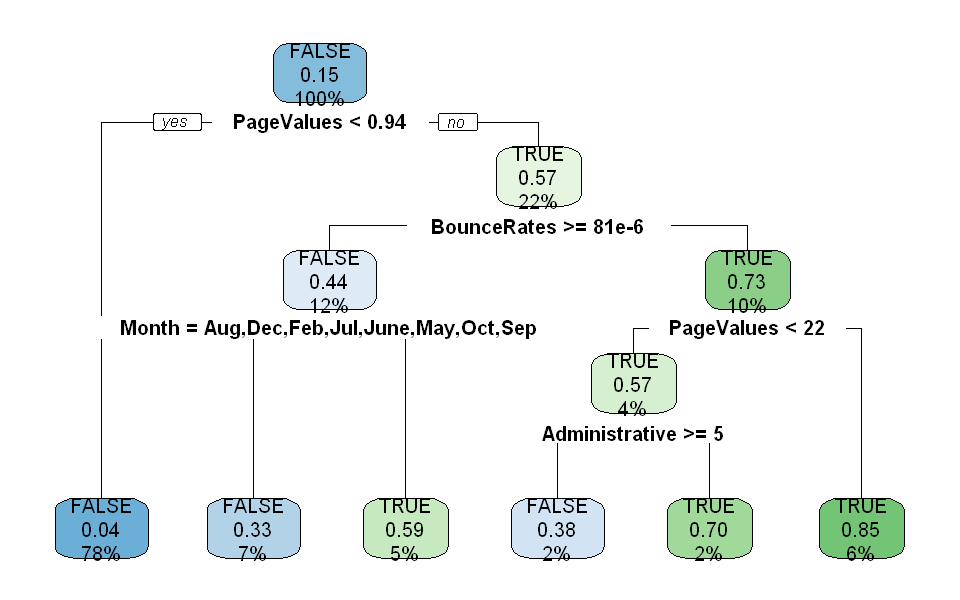

In [70]:
rpart.plot(talltree)

This is a model with a multi-class response. Each node shows
the predicted class (TRUE,FALSE),
the predicted probability of each class,
the percentage of observations in the node

#### MONTH ANALYSIS

Month,counts
Aug,433
Dec,1727
Feb,184
Jul,432
June,288
Mar,1907
May,3364
Nov,2998
Oct,549
Sep,448


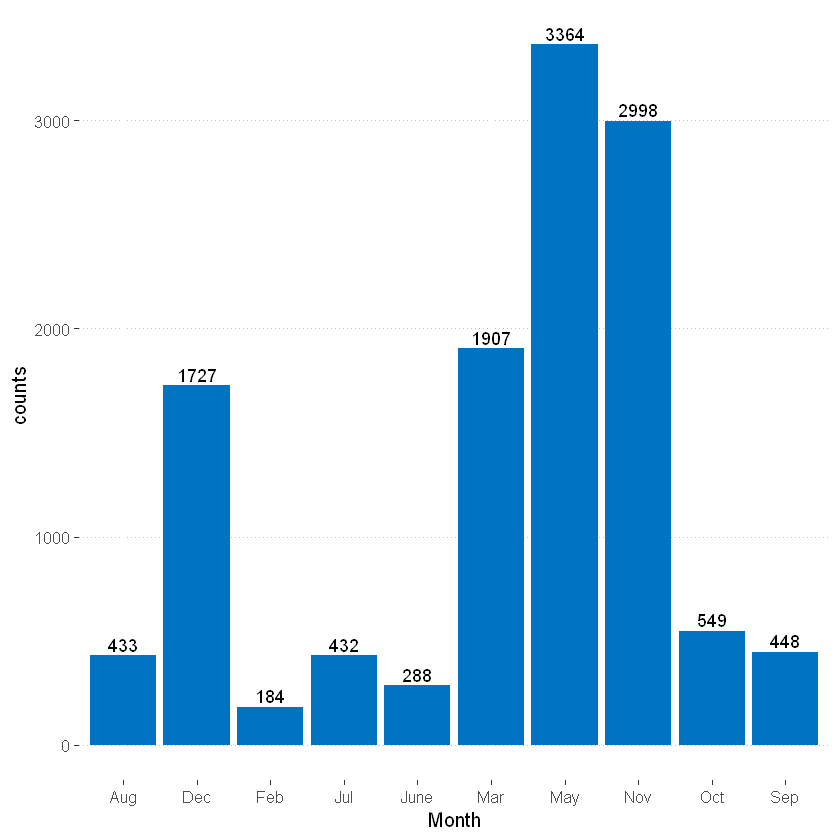

In [27]:
library(dplyr)
dief <- df %>%
  group_by(Month) %>%
  summarise(counts = n())
dief

ggplot(dief, aes(x = Month, y = counts)) +
  geom_bar(fill = "#0073C2FF", stat = "identity") +
  geom_text(aes(label = counts), vjust = -0.3) + 
  theme_pubclean()

May, November and December had the highest frequency

There is no data from January and April

#### VISITOR TYPE ANALYSIS

VisitorType,counts,prop,lab.ypos
Returning_Visitor,10551,85.6,42.80
Other,85,0.7,85.95
New_Visitor,1694,13.7,93.15


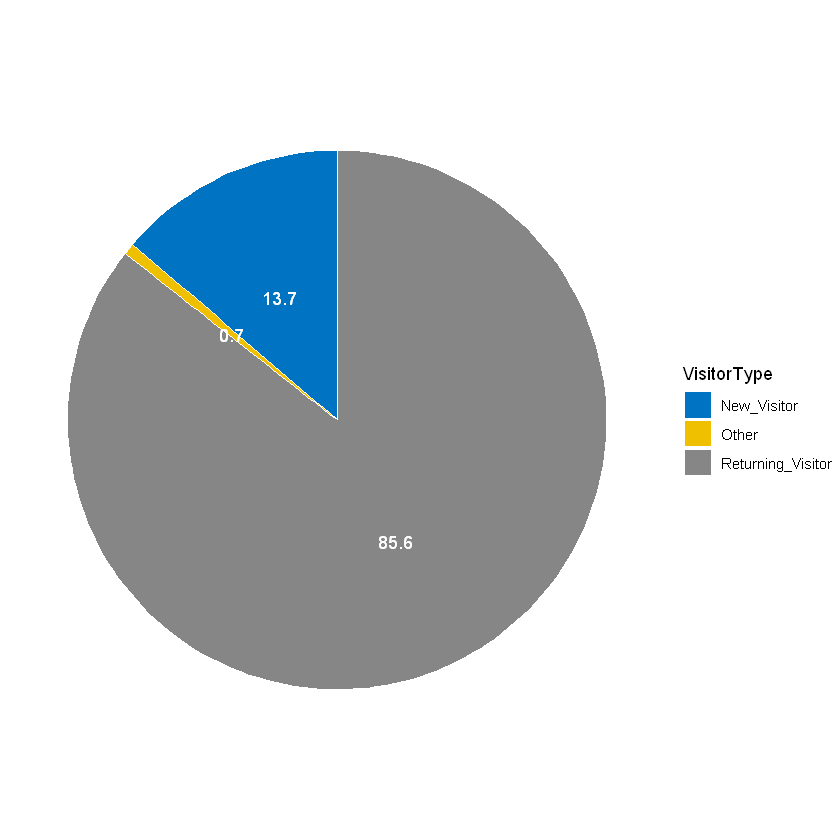

In [33]:
z = df %>%group_by(VisitorType) %>% summarise(counts = n())

dief <- z %>%
  arrange(desc(VisitorType)) %>%
  mutate(prop = round(counts*100/sum(counts), 1),
         lab.ypos = cumsum(prop) - 0.5*prop)
head(dief, 4)

ggplot(dief, aes(x = "", y = prop, fill = VisitorType)) +
  geom_bar(width = 1, stat = "identity", color = "white") +
  geom_text(aes(y = lab.ypos, label = prop), color = "white")+
  coord_polar("y", start = 0)+
  ggpubr::fill_palette("jco")+
  theme_void()

returning visitors hold the highest proportion of people visiting the site

#### DISTRIBUTION vs TARGET

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 14 rows containing non-finite values (stat_bin)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 14 rows containing non-finite values (stat_bin)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 14 rows containing non-finite values (stat_bin)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 14 rows containing non-finite values (stat_bin)."

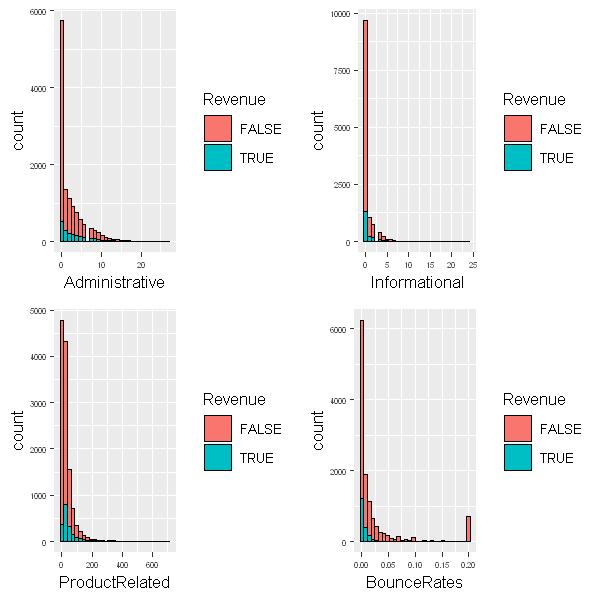

In [49]:
# VARIABLE DISTRIBUTION PLOTS

h1 <- ggplot(df, aes(x=Administrative, fill = Revenue)) + 
  geom_histogram(color="black")+
  theme(text = element_text(size=10) ,axis.text.x = element_text(size = 5),axis.text.y = element_text(size = 5))

h2 <- ggplot(df, aes(x=Informational, fill = Revenue)) + 
  geom_histogram(color="black")+
  theme(text = element_text(size=10) ,axis.text.x = element_text(size = 5),axis.text.y = element_text(size = 5))

h3 <- ggplot(df, aes(x=ProductRelated, fill = Revenue)) + 
  geom_histogram(color="black")+
  theme(text = element_text(size=10) ,axis.text.x = element_text(size = 5),axis.text.y = element_text(size = 5))

h4 <- ggplot(df, aes(x=BounceRates, fill = Revenue)) + 
  geom_histogram(color="black")+
  theme(text = element_text(size=10) ,axis.text.x = element_text(size = 5),axis.text.y = element_text(size = 5))

plot_grid(h1,h2,h3,h4)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 14 rows containing non-finite values (stat_bin)."`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


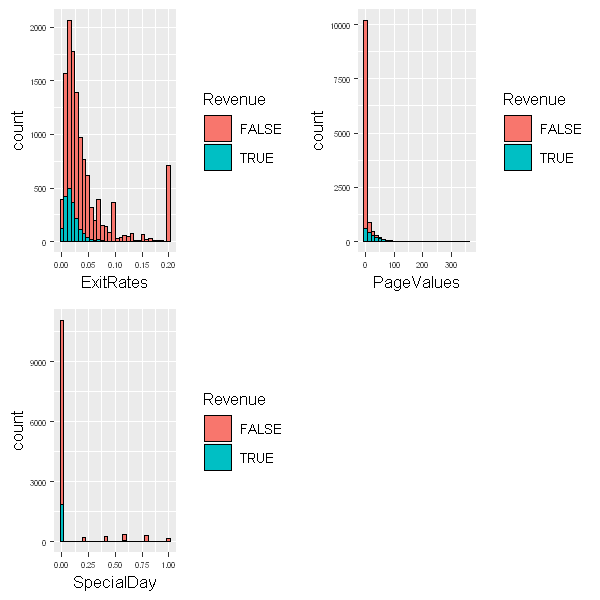

In [52]:
h5 <- ggplot(df, aes(x=ExitRates, fill = Revenue)) + 
  geom_histogram(color="black")+
  theme(text = element_text(size=10) ,axis.text.x = element_text(size = 5),axis.text.y = element_text(size = 5))

h6 <- ggplot(df, aes(x=PageValues, fill = Revenue)) + 
  geom_histogram(color="black")+
  theme(text = element_text(size=10) ,axis.text.x = element_text(size = 5),axis.text.y = element_text(size = 5))

h7 <- ggplot(df, aes(x=SpecialDay, fill = Revenue)) + 
  geom_histogram(color="black")+
  theme(text = element_text(size=10) ,axis.text.x = element_text(size = 5),axis.text.y = element_text(size = 5))

plot_grid(h5,h6,h7)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


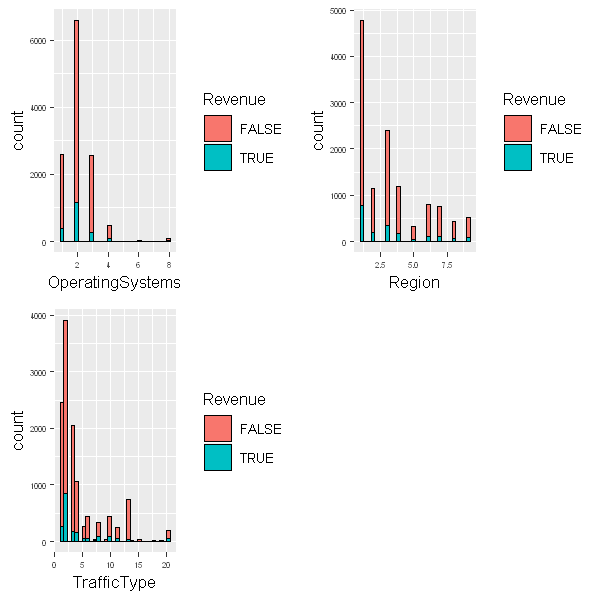

In [51]:

h8 <- ggplot(df, aes(x=OperatingSystems, fill = Revenue)) + 
  geom_histogram(color="black")+
  theme(text = element_text(size=10) ,axis.text.x = element_text(size = 5),axis.text.y = element_text(size = 5))

h9 <- ggplot(df, aes(x=Region, fill = Revenue)) + 
  geom_histogram(color="black")+
  theme(text = element_text(size=10) ,axis.text.x = element_text(size = 5),axis.text.y = element_text(size = 5))

h10 <- ggplot(df, aes(x=TrafficType, fill = Revenue)) + 
  geom_histogram(color="black")+
  theme(text = element_text(size=10) ,axis.text.x = element_text(size = 5),axis.text.y = element_text(size = 5))

plot_grid(h8,h9,h10)

Warning message:
"Removed 14 rows containing missing values (geom_point)."Warning message:
"Removed 14 rows containing missing values (geom_point)."Warning message:
"Removed 14 rows containing missing values (geom_point)."

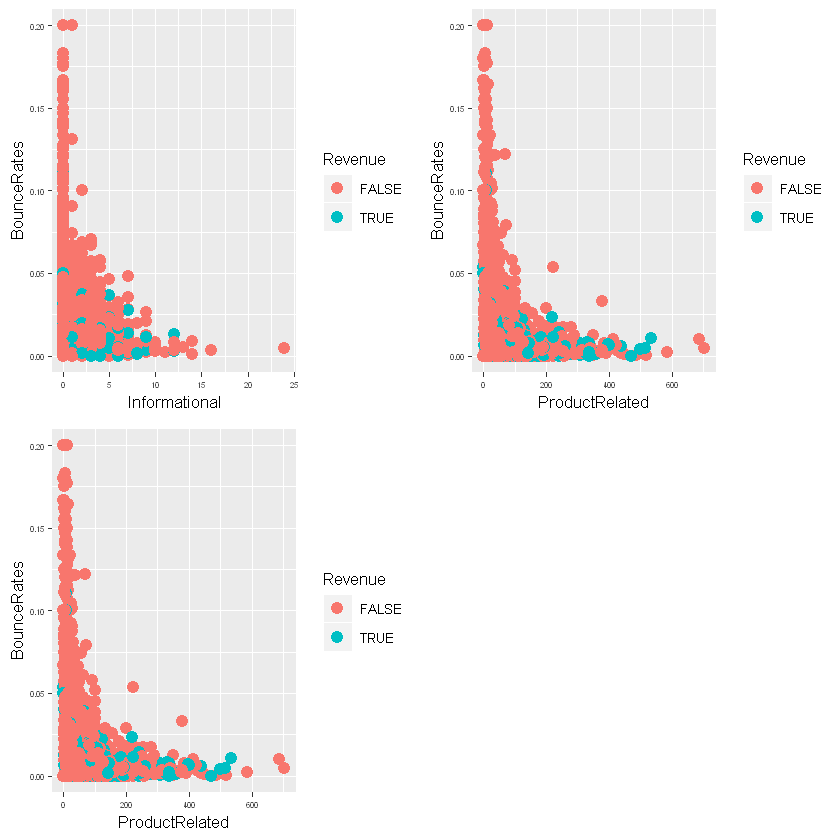

In [9]:
# INDEPENDENT VARIABLE VS TARGET

p1 <- ggplot(df, aes(x=Informational, y=BounceRates, color=Revenue)) + geom_point(size=3)+
  theme(text = element_text(size=10) ,axis.text.x = element_text(size = 5),axis.text.y = element_text(size = 5))

p2 <- ggplot(df, aes(x=ProductRelated, y=BounceRates, color=Revenue)) + geom_point(size=3)+
  theme(text = element_text(size=10) ,axis.text.x = element_text(size = 5),axis.text.y = element_text(size = 5))

p3 <- ggplot(df, aes(x=ProductRelated, y=BounceRates, color=Revenue)) + geom_point(size=3)+
  theme(text = element_text(size=10) ,axis.text.x = element_text(size = 5),axis.text.y = element_text(size = 5))

p4 <- ggplot(df, aes(x=Area.Income, y=Daily.Internet.Usage, color=Clicked.on.Ad)) + geom_point(size=3)+
  theme(text = element_text(size=10) ,axis.text.x = element_text(size = 5),axis.text.y = element_text(size = 5))



plot_grid(p1,p2,p3)

Warning message:
"Removed 112 rows containing non-finite values (stat_boxplot)."

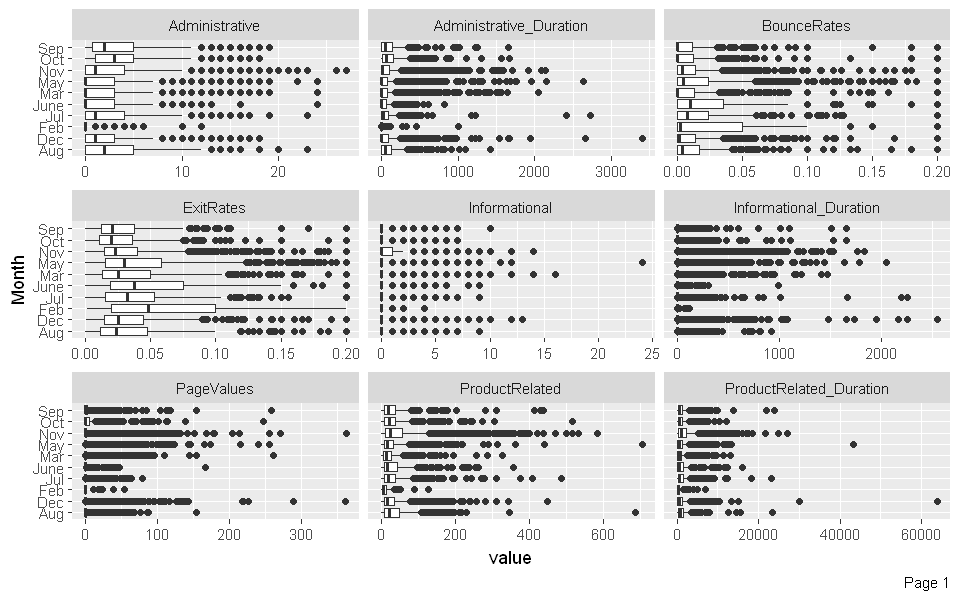

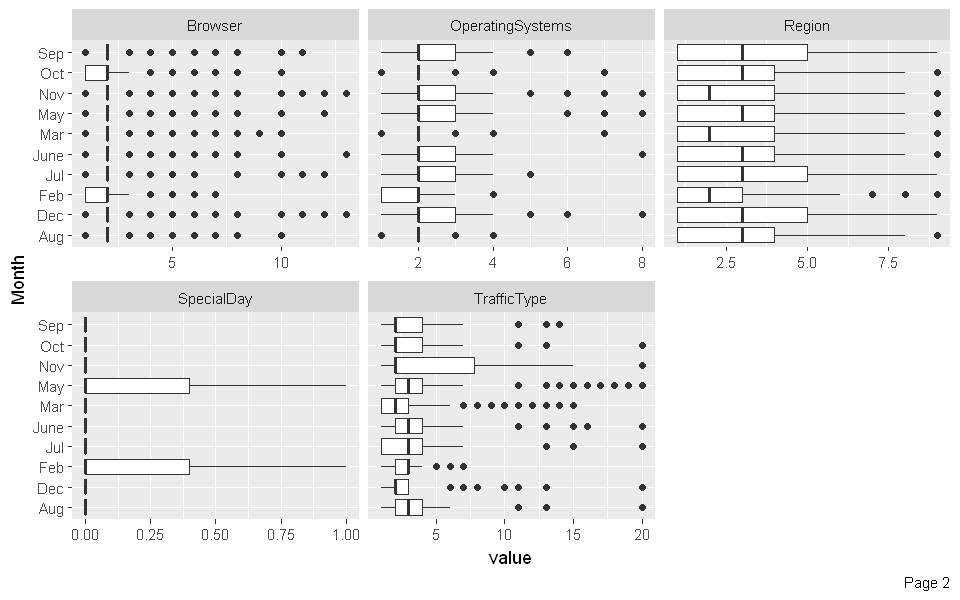

In [73]:
plot_boxplot(df, by= 'Month',  ncol = 3)

#### CORRELATION

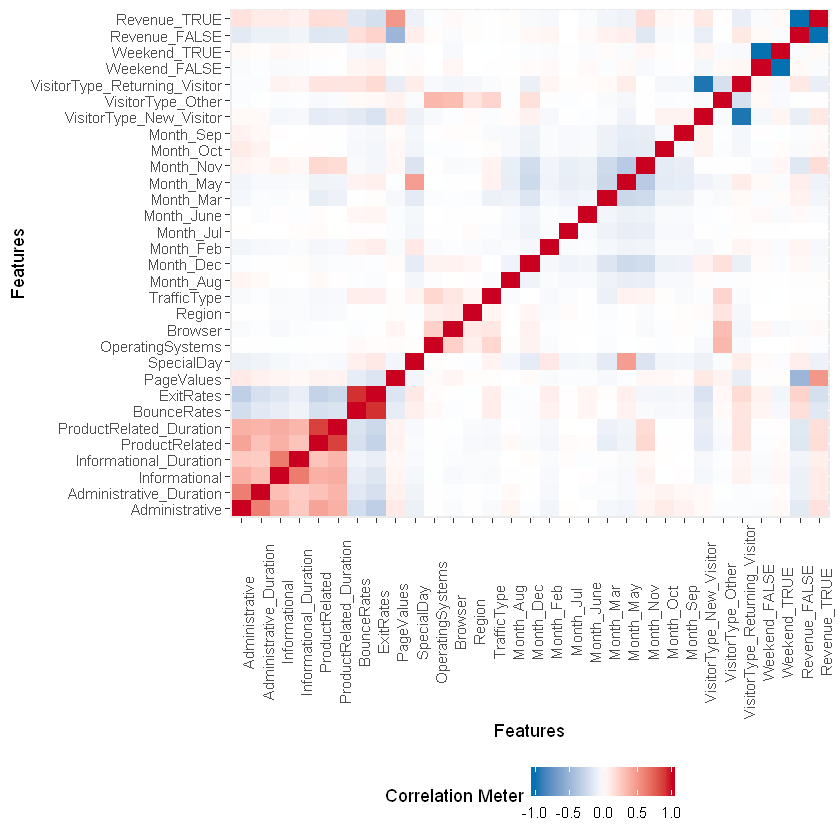

In [41]:
plot_correlation(df, cor_args = list( 'use' = 'complete.obs'))

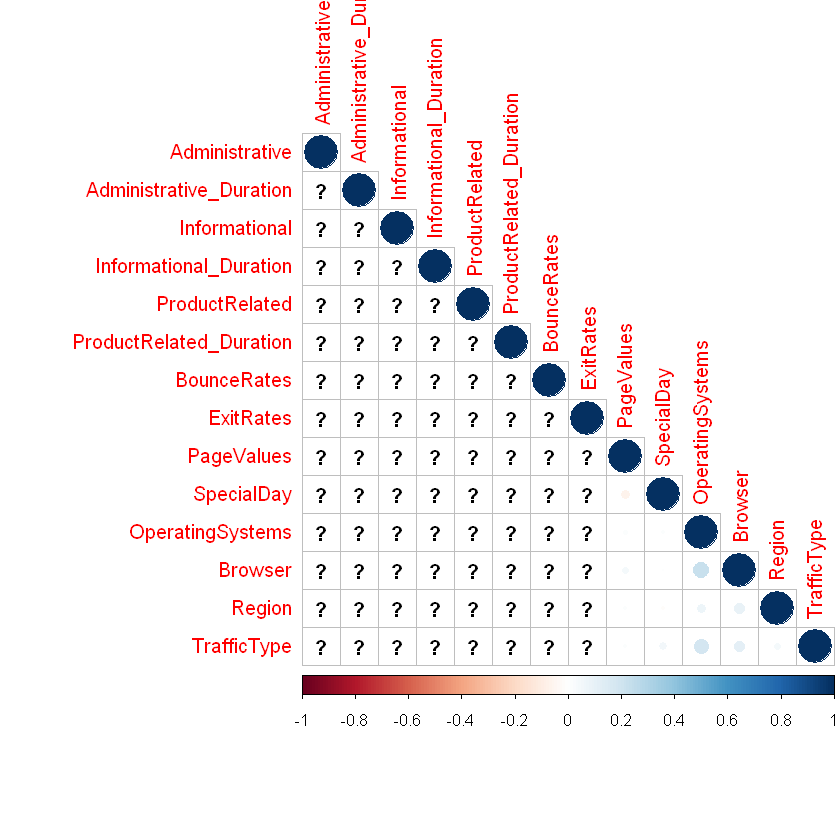

In [43]:
corr <- cor(numeric_cols)
corrplot(corr, type = 'lower')

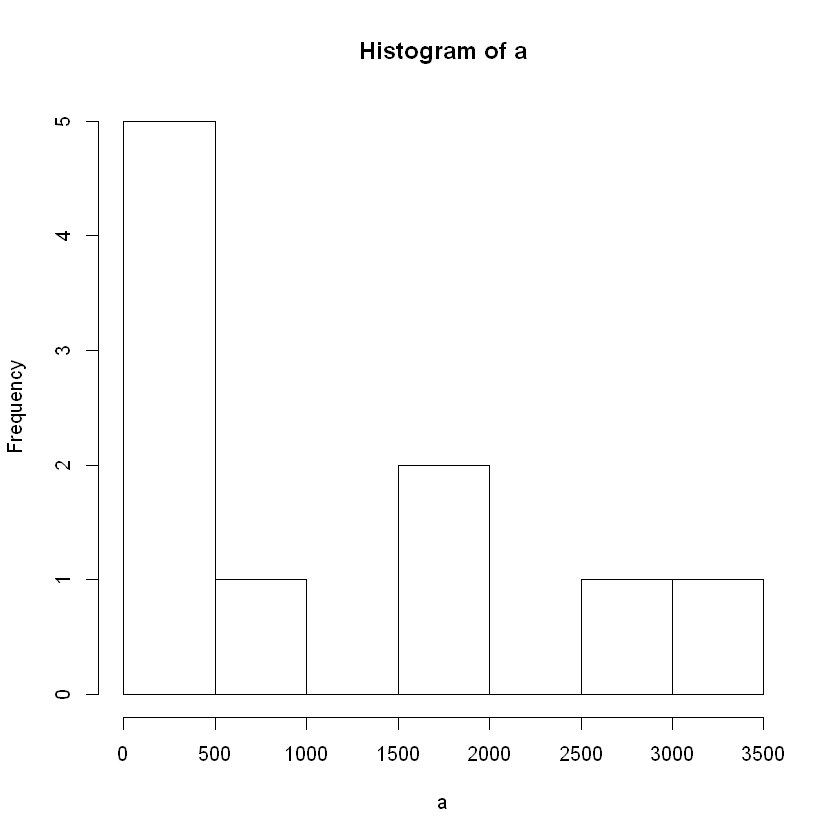

In [14]:
a <- table(df$Month)



#### TARGET FEATURE ANALYSIS

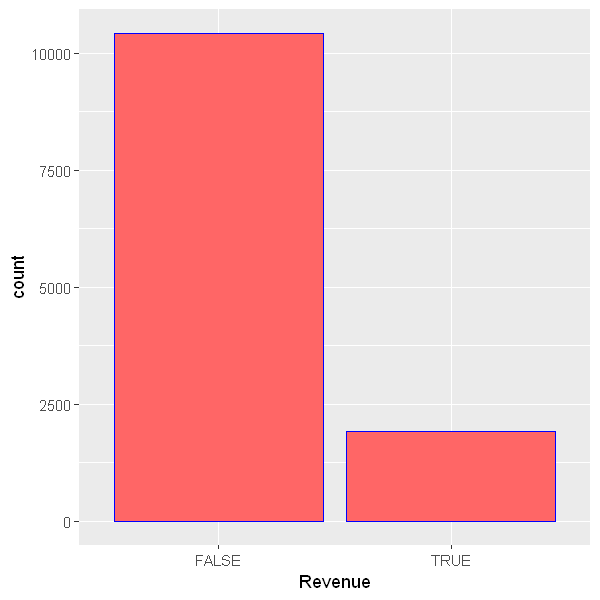

In [44]:
#PLOTTING THE TARGET FEATURE
options(repr.plot.width=5, repr.plot.height=5)

ggplot(df, aes(x = Revenue)) + geom_bar(color='blue',fill = "#FF6666")

Warning message in log(Administrative_Duration):
"NaNs produced"Warning message in log(Administrative_Duration):
"NaNs produced"Warning message:
"Removed 47 rows containing missing values (geom_point)."Warning message in log(Informational_Duration):
"NaNs produced"Warning message in log(Informational_Duration):
"NaNs produced"Warning message:
"Removed 47 rows containing missing values (geom_point)."Warning message:
"Removed 14 rows containing missing values (geom_point)."Warning message in log(ProductRelated_Duration):
"NaNs produced"Warning message in log(ProductRelated_Duration):
"NaNs produced"Warning message:
"Removed 47 rows containing missing values (geom_point)."Warning message:
"Removed 14 rows containing missing values (geom_point)."Warning message:
"Removed 14 rows containing missing values (geom_point)."

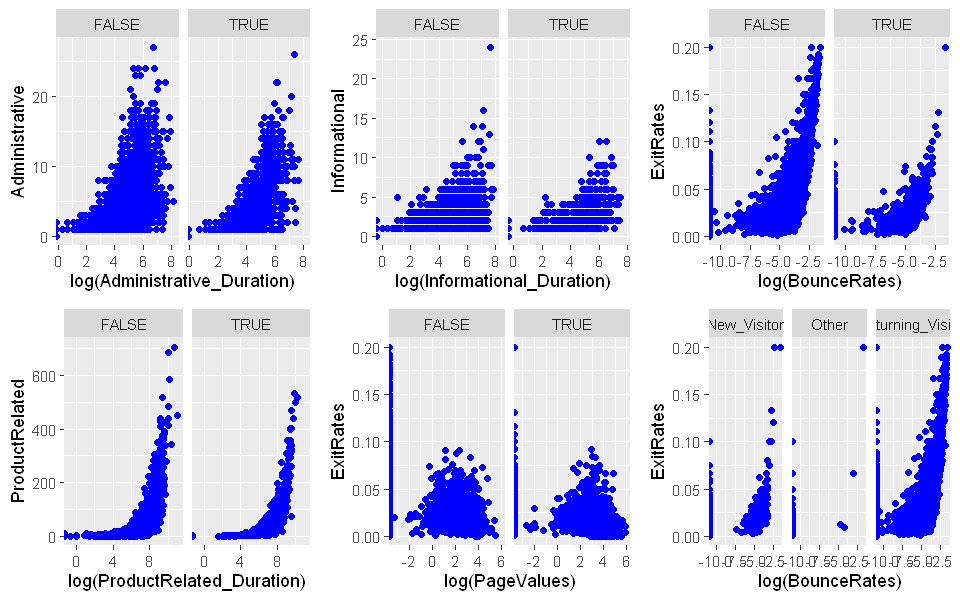

In [69]:
a = ggplot(df, aes(x=log(Administrative_Duration),y=Administrative)) + geom_point(color='blue')+ facet_wrap(~Revenue)

b = ggplot(df, aes(x=log(Informational_Duration),y=Informational)) + geom_point(color='blue')+ facet_wrap(~Revenue)

c = ggplot(df, aes(x=log(BounceRates),y=ExitRates)) + geom_point(color='blue')+ facet_wrap(~Revenue)

d = ggplot(df, aes(x=log(ProductRelated_Duration),y=ProductRelated)) + geom_point(color='blue')+ facet_wrap(~Revenue)

e = ggplot(df, aes(x=log(PageValues),y=ExitRates)) + geom_point(color='blue')+ facet_wrap(~Revenue)

f = ggplot(df, aes(x=log(BounceRates),y=ExitRates)) + geom_point(color='blue')+ facet_wrap(~VisitorType)

plot_grid(a,b,c,d,e,f)

## Modelling

#### I. Getting Dummies for Categorical columns

#### II. Splitting Data Target & Feature sets

## Challenge the Solution